<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/201_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

201. 데이터 정제 예제

In [ ]:
# 데이터 분석 목적에 적합한 작업 진행하기!!

# 타이타닉 데이터 읽어오기
titanic <- read.csv("https://raw.githubusercontent.com/gyujin0450/dataset/master/titanic.csv")
head(titanic,10) 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
8,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S


In [ ]:
str(titanic) # 데이터 구조 파악

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1308 levels "","Abbing, Mr. Anthony",..: 23 25 26 27 28 32 47 48 52 56 ...
 $ sex     : Factor w/ 3 levels "","female","male": 2 3 2 3 2 3 2 3 2 3 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 930 levels "","110152","110413",..: 189 51 51 51 51 126 94 17 78 827 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


In [ ]:
summary(titanic) # 요약통계

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000                                :   1  
 Mean   :2.295   Mean   :0.382   Abbing, Mr. Anthony          :   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Master. Eugene Joseph:   1  
 Max.   :3.000   Max.   :1.000   Abbott, Mr. Rossmore Edward  :   1  
 NA's   :1       NA's   :1       (Other)                      :1302  
     sex           age              sibsp            parch      
       :  1   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 female:466   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 male  :843   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

In [ ]:
colSums(is.na(titanic)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0      264        1        1        0 
    fare    cabin embarked 
       2        0        0

In [ ]:
# 결측치 처리 
# 1) 결측치 건수가 적은것은 제거 :  na.omit()
titanic2 <- na.omit(titanic)
colSums(is.na(titanic2))

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

In [ ]:
# 2) 대체값 넣기 : age 결측치는 중앙값으로 대체
# 소숫점 이하 처리 : round(반올림), floor(내림), ceil(올림)
mv <- floor(median(titanic$age, na.rm = T))
mv

[1] 28

In [ ]:
# 중앙값으로 결측치 대치(조건문 필요!!!)
# boolean 인텍스
# titanic$age[] <- mv # 모든 나이컬럼에 중앙값 대입(X)
# is.na(titanic$age) #  age 컬럼의 결측치 여부 확인
# age 컬럼의 결측치를 포함된 항목을 찾아서 중앙값(mv)으로 대치
titanic$age[is.na(titanic$age)] <- mv
colSums(is.na(titanic))
# 나머지 결측치 제거
titanic3 <- na.omit(titanic) 
colSums(is.na(titanic3))

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0        0        1        1        0 
    fare    cabin embarked 
       2        0        0

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

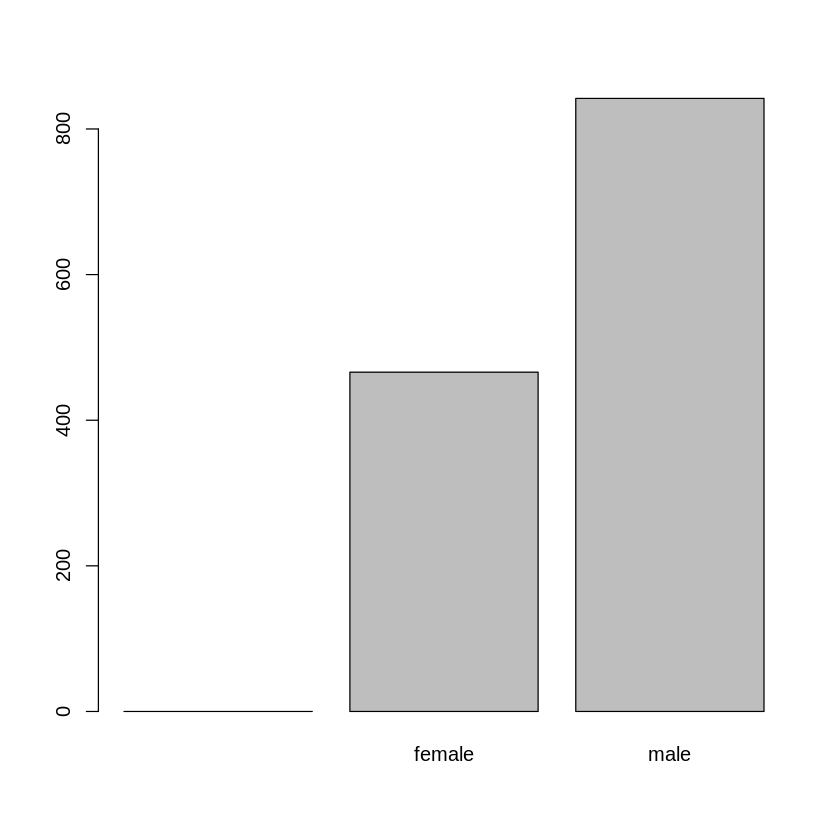

In [ ]:
# 시각화
# 성별 승성객 수 시각화
frq_sex <- table(titanic3$sex)
barplot(frq_sex)# 성별 승성객 수 시각화
frq_sex <- table(titanic3$sex)
barplot(frq_sex)

In [ ]:
# 위 결과, 여전히 이상한 값이 있는 듯...
table(titanic$sex)


       female   male 
     1    466    843 

In [ ]:
# Tip) read.csv 알아보기
# csv로 작성된 파일을 R로 읽어들일때 사용
# read.csv('파일경로', 헤더여부, 구분자, 결측치처리, 인코딩)
# read.csv('파일경로', header=F, sep='\t', na.strings='', encoding='euc-kr') 
# 구분자 : 탭의 경우 '\t'
# 결측치 : 빈문자열이 있는 경우 NA로 대체
# 한글로 작성된 자료 인코딩해야 하는 경우, euc-kr 로 함. 그래서, 가능하면 UTF-8로 작성 필요!!                          

In [ ]:
titanic_na <- read.csv("https://raw.githubusercontent.com/gyujin0450/dataset/master/titanic.csv", na.strings='')

In [ ]:
summary(titanic)

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000                                :   1  
 Mean   :2.295   Mean   :0.382   Abbing, Mr. Anthony          :   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Master. Eugene Joseph:   1  
 Max.   :3.000   Max.   :1.000   Abbott, Mr. Rossmore Edward  :   1  
 NA's   :1       NA's   :1       (Other)                      :1302  
     sex           age              sibsp            parch      
       :  1   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 female:466   1st Qu.:22.0000   1st Qu.:0.0000   1st Qu.:0.000  
 male  :843   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.5020   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:35.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

In [ ]:
summary(titanic_na)

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000   Abbing, Mr. Anthony          :   1  
 Mean   :2.295   Mean   :0.382   Abbott, Master. Eugene Joseph:   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Mr. Rossmore Edward  :   1  
 Max.   :3.000   Max.   :1.000   (Other)                      :1302  
 NA's   :1       NA's   :1       NA's                         :   1  
     sex           age              sibsp            parch      
 female:466   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 male  :843   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 NA's  :  1   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

In [ ]:
colSums(is.na(titanic_na)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        1        1      264        1        1        1 
    fare    cabin embarked 
       2     1015        3

In [ ]:
mv <- floor(median(titanic_na$age, na.rm = T))
mv
titanic_na$age[is.na(titanic_na$age)] <- mv
colSums(is.na(titanic_na))

[1] 28

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        1        1        0        1        1        1 
    fare    cabin embarked 
       2     1015        3

In [ ]:
# 나머지 결측치 제거
titanic_omit <- na.omit(titanic_na) 
colSums(is.na(titanic_omit))

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

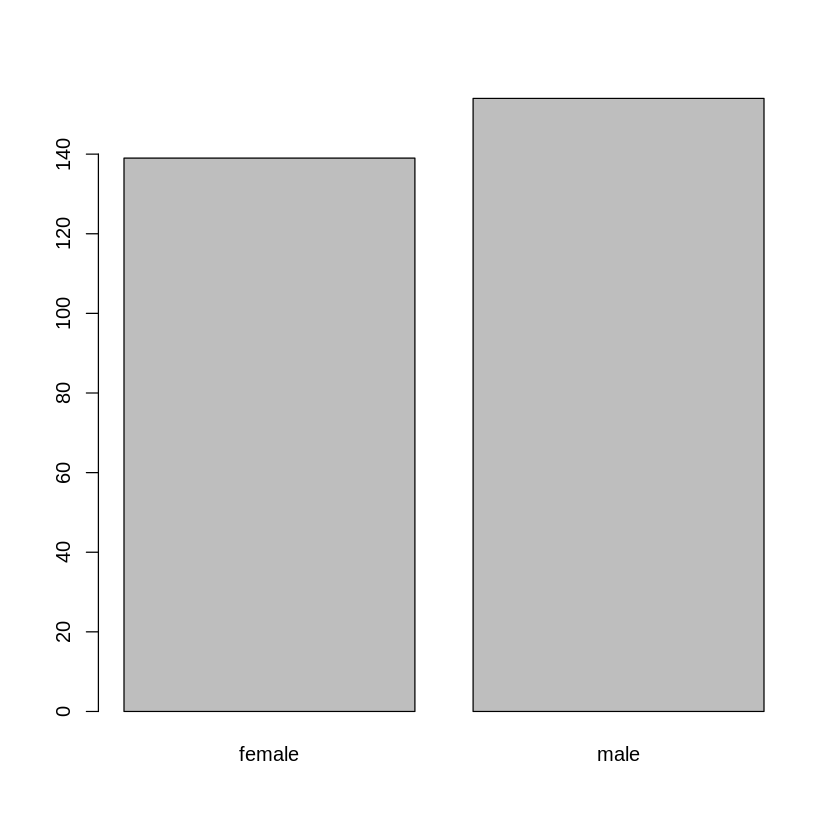

In [ ]:
# 성별 승성객 수 시각화
frq_sex <- table(titanic_omit$sex)
barplot(frq_sex)

In [ ]:
# 작업한 내용을 파일에 저장하기
# write.csv('저장경로', row.names=F) : csv 파일로 저장
# save(객체, '저장경로') : R용 data 파일로 저장
getwd()

[1] "/content"

In [ ]:
write.csv(titanic_omit,'titanic_omit.csv') # 타이타닉 데이테프레임을 titanic_omit.csv 이라는 파일을 현재경로에 저장

In [ ]:
write.csv(titanic_omit,'titanic_omit_norow.csv', row.names=F) # 타이타닉 데이테프레임을 titanic_omit.csv 이라는 파일을 현재경로에 저장(row.name이 없게)

In [ ]:
save(titanic_omit, file='titanic_save.rdata') # 타이타닉 데이테프레임을 R전용 데이터 파일로 저장(호환성을 위해 csv로 저장하는 것을 권장함)

In [ ]:
# ANSI 우편번호 데이터 읽기

# zipcode <- read.csv('https://raw.githubusercontent.com/gyujin0450/dataset/master/zipcode_2013.txt')
# zipcode <- read.csv('https://raw.githubusercontent.com/gyujin0450/dataset/master/zipcode_2013.csv', encoding='euc-kr')
# 한글이 제대로 출력되지 않음

# 코랩틀 통해 데이터 파일을 읽어오는 경우
# 파일의 인코딩은 반드시 반드시 UTF-8로 설정할 것~!!
# 대욜량 파일의 경우, notepad-plus-plus.org 에서 note++ 설치
zipcode <- read.csv('https://raw.githubusercontent.com/gyujin0450/dataset/master/zipcode_2013_utf8.csv', sep='\t')
head(zipcode,5)

,ZIPCODE,SIDO,GUGUN,DONG,RI,BUNJI,SEQ
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,135-806,서울,강남구,개포1동,경남아파트,,1
2,135-807,서울,강남구,개포1동,우성3차아파트,(1∼6동),2
3,135-806,서울,강남구,개포1동,우성9차아파트,(901∼902동),3
4,135-770,서울,강남구,개포1동,주공아파트,(1∼16동),4
5,135-805,서울,강남구,개포1동,주공아파트,(17∼40동),5


In [ ]:
zip <- na.omit(zipcode) # na로 변경하고 지원야 함!!!
head(zip,5)

,ZIPCODE,SIDO,GUGUN,DONG,RI,BUNJI,SEQ
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,135-806,서울,강남구,개포1동,경남아파트,,1
2,135-807,서울,강남구,개포1동,우성3차아파트,(1∼6동),2
3,135-806,서울,강남구,개포1동,우성9차아파트,(901∼902동),3
4,135-770,서울,강남구,개포1동,주공아파트,(1∼16동),4
5,135-805,서울,강남구,개포1동,주공아파트,(17∼40동),5


In [ ]:
# 결측치를 NA로 변경함
zipcode2 <- read.csv('https://raw.githubusercontent.com/gyujin0450/dataset/master/zipcode_2013_utf8.csv', sep='\t', na.strings='')
head(zipcode2,5)

,ZIPCODE,SIDO,GUGUN,DONG,RI,BUNJI,SEQ
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,135-806,서울,강남구,개포1동,경남아파트,NA,1
2,135-807,서울,강남구,개포1동,우성3차아파트,(1∼6동),2
3,135-806,서울,강남구,개포1동,우성9차아파트,(901∼902동),3
4,135-770,서울,강남구,개포1동,주공아파트,(1∼16동),4
5,135-805,서울,강남구,개포1동,주공아파트,(17∼40동),5


In [ ]:
colSums(is.na(zipcode2))

ZIPCODE    SIDO   GUGUN    DONG      RI   BUNJI     SEQ 
      0       0     186       0   20489   31541       0

In [ ]:
colSums(is.na(zip))

ZIPCODE    SIDO   GUGUN    DONG      RI   BUNJI     SEQ 
      0       0       0       0       0       0       0

In [ ]:
# 사원데이터 읽어오기
emp <- read.csv('https://raw.githubusercontent.com/gyujin0450/dataset/master/EMPLOYEES.csv')
head(emp,5)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
1,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000,NA,NA,90
2,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000,NA,100,90
3,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000,NA,100,90
4,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000,NA,102,60
5,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000,NA,103,60


In [ ]:
# 수당(COMMISSION_PCT)이 없는 경우 0으로 대체
# titanic$age[is.na(titanic$age)] <- mv
# colSums(is.na(titanic))
# emp$COMMISSION_PCT[is.na(emp$COMMISSION_PCT)] <- 0
cnd <- is.na(emp$COMMISSION_PCT)
emp$COMMISSION_PCT[cnd] <- 0
head(emp,5)
tail(emp,5)
colSums(is.na(emp))

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
1,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000,0,NA,90
2,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000,0,100,90
3,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000,0,100,90
4,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000,0,102,60
5,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000,0,103,60


,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
103,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000,0,201,20
104,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500,0,101,40
105,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000,0,101,70
106,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008,0,101,110
107,206,William,Gietz,WGIETZ,515.123.8181,2002-06-07,AC_ACCOUNT,8300,0,205,110


EMPLOYEE_ID     FIRST_NAME      LAST_NAME          EMAIL   PHONE_NUMBER 
             0              0              0              0              0 
     HIRE_DATE         JOB_ID         SALARY COMMISSION_PCT     MANAGER_ID 
             0              0              0              0              1 
 DEPARTMENT_ID 
             1

In [ ]:
str(emp)

'data.frame':	107 obs. of  11 variables:
 $ EMPLOYEE_ID   : int  100 101 102 103 104 105 106 107 108 109 ...
 $ FIRST_NAME    : Factor w/ 91 levels "Adam","Alana",..: 80 64 51 4 11 18 88 20 61 16 ...
 $ LAST_NAME     : Factor w/ 102 levels "Abel","Ande",..: 50 51 20 44 24 4 74 57 38 27 ...
 $ EMAIL         : Factor w/ 107 levels "ABANDA","ABULL",..: 90 74 61 6 11 17 104 23 73 19 ...
 $ PHONE_NUMBER  : Factor w/ 107 levels "011.44.1343.329268",..: 37 38 39 58 59 60 57 61 50 45 ...
 $ HIRE_DATE     : Factor w/ 98 levels "2001-01-13","2002-06-07",..: 8 40 1 49 79 34 51 73 4 3 ...
 $ JOB_ID        : Factor w/ 19 levels "AC_ACCOUNT","AC_MGR",..: 4 5 5 9 9 9 9 9 7 6 ...
 $ SALARY        : int  24000 17000 17000 9000 6000 4800 4800 4200 12008 9000 ...
 $ COMMISSION_PCT: num  0 0 0 0 0 0 0 0 0 0 ...
 $ MANAGER_ID    : int  NA 100 100 102 103 103 103 103 101 108 ...
 $ DEPARTMENT_ID : int  90 90 90 60 60 60 60 60 100 100 ...


In [ ]:
summary(emp)

  EMPLOYEE_ID        FIRST_NAME     LAST_NAME       EMAIL    
 Min.   :100.0   David    : 3   Cambrault: 2   ABANDA  :  1  
 1st Qu.:126.5   John     : 3   Grant    : 2   ABULL   :  1  
 Median :153.0   Peter    : 3   King     : 2   ACABRIO :  1  
 Mean   :153.0   Alexander: 2   Smith    : 2   AERRAZUR:  1  
 3rd Qu.:179.5   James    : 2   Taylor   : 2   AFRIPP  :  1  
 Max.   :206.0   Jennifer : 2   Abel     : 1   AHUNOLD :  1  
                 (Other)  :92   (Other)  :96   (Other) :101  
             PHONE_NUMBER      HIRE_DATE         JOB_ID       SALARY     
 011.44.1343.329268:  1   2002-06-07: 4   SA_REP    :30   Min.   : 2100  
 011.44.1343.529268:  1   2005-03-10: 2   SH_CLERK  :20   1st Qu.: 3100  
 011.44.1343.629268:  1   2005-08-20: 2   ST_CLERK  :20   Median : 6200  
 011.44.1343.729268:  1   2006-01-24: 2   FI_ACCOUNT: 5   Mean   : 6462  
 011.44.1343.829268:  1   2007-02-07: 2   IT_PROG   : 5   3rd Qu.: 8900  
 011.44.1343.929268:  1   2007-06-21: 2   PU_CLERK  : 5   Ma

In [ ]:
# 연습문제
# 1973년, 뉴욕에서 수집한 일간 대기질 데이터인
# airquality를 이용해서 결측치를 알아 보고
# 적절한 값으로 대체해보세요
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

In [ ]:
colSums(is.na(airquality))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

In [ ]:
head(airquality,10)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9


In [ ]:
# Ozone : 37 / Solar.R : 7
